<a href="https://colab.research.google.com/github/Ishani-Patel/data690_fall2022/blob/main/assignment_06/assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data_09012022.zip


--2022-10-10 15:43:14--  https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data_09012022.zip
Resolving ed-public-download.app.cloud.gov (ed-public-download.app.cloud.gov)... 3.30.138.208, 3.30.49.38, 2600:1f12:18a:7d01:ad67:f64c:95d6:78ed, ...
Connecting to ed-public-download.app.cloud.gov (ed-public-download.app.cloud.gov)|3.30.138.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 410294884 (391M) [application/zip]
Saving to: ‘CollegeScorecard_Raw_Data_09012022.zip’

CollegeScorecard_Ra 100%[===================>] 391.29M  71.5MB/s    in 5.8s    

2022-10-10 15:43:20 (67.9 MB/s) - ‘CollegeScorecard_Raw_Data_09012022.zip’ saved [410294884/410294884]



In [3]:
!unzip CollegeScorecard_Raw_Data_09012022.zip


Archive:  CollegeScorecard_Raw_Data_09012022.zip
 extracting: Crosswalks.zip          
  inflating: data.yaml               
  inflating: FieldOfStudyData1415_1516_PP.csv  
  inflating: FieldOfStudyData1516_1617_PP.csv  
  inflating: FieldOfStudyData1617_1718_PP.csv  
  inflating: FieldOfStudyData1718_1819_PP.csv  
  inflating: MERGED1996_97_PP.csv    
  inflating: MERGED1997_98_PP.csv    
  inflating: MERGED1998_99_PP.csv    
  inflating: MERGED1999_00_PP.csv    
  inflating: MERGED2000_01_PP.csv    
  inflating: MERGED2001_02_PP.csv    
  inflating: MERGED2002_03_PP.csv    
  inflating: MERGED2003_04_PP.csv    
  inflating: MERGED2004_05_PP.csv    
  inflating: MERGED2005_06_PP.csv    
  inflating: MERGED2006_07_PP.csv    
  inflating: MERGED2007_08_PP.csv    
  inflating: MERGED2008_09_PP.csv    
  inflating: MERGED2009_10_PP.csv    
  inflating: MERGED2010_11_PP.csv    
  inflating: MERGED2011_12_PP.csv    
  inflating: MERGED2012_13_PP.csv    
  inflating: MERGED2013_14_PP.csv    

In [4]:
import pandas as pd
import os

In [5]:
os.getcwd()


'/content'

In [6]:
name_list = os.listdir()
name_list

['.config',
 'MERGED2006_07_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED1998_99_PP.csv',
 'Crosswalks.zip',
 'MERGED2012_13_PP.csv',
 'MERGED2019_20_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2014_15_PP.csv',
 'Most-Recent-Cohorts-Field-of-Study.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2016_17_PP.csv',
 'FieldOfStudyData1718_1819_PP.csv',
 'MERGED2018_19_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2005_06_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED1996_97_PP.csv',
 'FieldOfStudyData1415_1516_PP.csv',
 'FieldOfStudyData1617_1718_PP.csv',
 'MERGED2017_18_PP.csv',
 'data.yaml',
 'Most-Recent-Cohorts-Institution.csv',
 'MERGED1997_98_PP.csv',
 'MERGED2020_21_PP.csv',
 'CollegeScorecard_Raw_Data_09012022.zip',
 'MERGED2001_02_PP.csv',
 'sample_data']

In [7]:
yearly_list = [file_name for file_name in name_list if file_name.startswith("MERGED")]

yearly_list

['MERGED2006_07_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2019_20_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2018_19_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED2020_21_PP.csv',
 'MERGED2001_02_PP.csv']

In [8]:
yearly_list.sort()

print("processing file", yearly_list[0])
df_all = pd.read_csv("/content/" + yearly_list[0], usecols=['UNITID', 'INSTNM', 'TUITIONFEE_IN'])
df_all["year"] = yearly_list[0][6:10]
print(df_all.shape)

for yearly_file in yearly_list[1:]:
    print("processing file", yearly_file)
    df = pd.read_csv("/content/" + yearly_file, usecols=['UNITID', 'INSTNM', 'TUITIONFEE_IN'])
    df["year"] = yearly_file[6:10]
    df_all = df_all.append(df, ignore_index = True)
    print(df_all.shape)

processing file MERGED1996_97_PP.csv
(7007, 4)
processing file MERGED1997_98_PP.csv
(13941, 4)
processing file MERGED1998_99_PP.csv
(20643, 4)
processing file MERGED1999_00_PP.csv
(27252, 4)
processing file MERGED2000_01_PP.csv
(33906, 4)
processing file MERGED2001_02_PP.csv
(40631, 4)
processing file MERGED2002_03_PP.csv
(47283, 4)
processing file MERGED2003_04_PP.csv
(53956, 4)
processing file MERGED2004_05_PP.csv
(60703, 4)
processing file MERGED2005_06_PP.csv
(67602, 4)
processing file MERGED2006_07_PP.csv
(74553, 4)
processing file MERGED2007_08_PP.csv
(81524, 4)
processing file MERGED2008_09_PP.csv
(88579, 4)
processing file MERGED2009_10_PP.csv
(95796, 4)
processing file MERGED2010_11_PP.csv
(103266, 4)
processing file MERGED2011_12_PP.csv
(111012, 4)
processing file MERGED2012_13_PP.csv
(118874, 4)
processing file MERGED2013_14_PP.csv
(126743, 4)
processing file MERGED2014_15_PP.csv
(134509, 4)
processing file MERGED2015_16_PP.csv
(142175, 4)
processing file MERGED2016_17_PP.cs

### Explore the new df

In [9]:
df_all.sample(10)

,UNITID,INSTNM,TUITIONFEE_IN,year
110325,459329,Fred K Marchman Technical College,NaN,2011
38206,225308,Trinity Valley Community College,900.0,2001
71977,234696,Bellingham Technical College,2976.0,2006
1698,153409,Purdue University Global-Mason City,NaN,1996
74066,445610,Anthem College-Kansas City,NaN,2006
94730,445203,Remington College-North Houston Campus,13950.0,2009
25225,230056,Broadview College,NaN,1999
30845,206880,Broken Arrow Beauty College-Broken Arrow,NaN,2000
14969,137892,ATI Career Training Center-Fort Lauderdale,NaN,1998
70210,187985,University of New Mexico-Main Campus,4336.0,2006


In [10]:
df_all.shape

(176707, 4)

In [11]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176707 entries, 0 to 176706
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UNITID         176707 non-null  int64  
 1   INSTNM         176707 non-null  object 
 2   TUITIONFEE_IN  86867 non-null   float64
 3   year           176707 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 5.4+ MB


In [12]:
df_all.tail()

,UNITID,INSTNM,TUITIONFEE_IN,year
176702,49576719,Pennsylvania State University-Penn State Wilke...,13604.0,2020
176703,49576720,Pennsylvania State University-Penn State York,14486.0,2020
176704,49576721,Pennsylvania State University-Penn State Great...,NaN,2020
176705,49576722,Pennsylvania State University-Penn State Harri...,15216.0,2020
176706,49576723,Pennsylvania State University-Penn State Brand...,14486.0,2020


In [13]:
df.describe()

,UNITID,TUITIONFEE_IN
count,6.681000e+03,3835.000000
mean,2.557806e+06,15988.881095
std,8.560860e+06,14107.349202
min,1.006540e+05,480.000000
25%,1.746040e+05,5491.000000
50%,2.307640e+05,11199.000000
75%,4.574930e+05,21008.000000
max,4.957672e+07,61671.000000


In [14]:
df_all.isnull()

,UNITID,INSTNM,TUITIONFEE_IN,year
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False
...,...,...,...,...
176702,False,False,False,False
176703,False,False,False,False
176704,False,False,True,False
176705,False,False,False,False


In [15]:
df_umbc=df_all[df_all["INSTNM"].str.contains("University of Maryland-Baltimore County")]


### Explore new df of UMBC

In [16]:
df_umbc

,UNITID,INSTNM,TUITIONFEE_IN,year
2151,163268,University of Maryland-Baltimore County,NaN,1996
9056,163268,University of Maryland-Baltimore County,NaN,1997
15923,163268,University of Maryland-Baltimore County,NaN,1998
22598,163268,University of Maryland-Baltimore County,NaN,1999
29178,163268,University of Maryland-Baltimore County,5490.0,2000
35821,163268,University of Maryland-Baltimore County,5910.0,2001
42524,163268,University of Maryland-Baltimore County,6362.0,2002
49156,163268,University of Maryland-Baltimore County,7388.0,2003
55786,163268,University of Maryland-Baltimore County,8020.0,2004
62522,163268,University of Maryland-Baltimore County,8520.0,2005


In [17]:
df_umbc.shape

(25, 4)

In [18]:
df_umbc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 2151 to 171401
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UNITID         25 non-null     int64  
 1   INSTNM         25 non-null     object 
 2   TUITIONFEE_IN  21 non-null     float64
 3   year           25 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1000.0+ bytes


In [19]:
df_umbc.tail(5)

,UNITID,INSTNM,TUITIONFEE_IN,year
143685,163268,University of Maryland-Baltimore County,11264.0,2016
150891,163268,University of Maryland-Baltimore County,11518.0,2017
157940,163268,University of Maryland-Baltimore County,11778.0,2018
164723,163268,University of Maryland-Baltimore County,12028.0,2019
171401,163268,University of Maryland-Baltimore County,9420.0,2020


In [20]:
df_umbc.describe()

,UNITID,TUITIONFEE_IN
count,25.0,21.000000
mean,163268.0,9168.571429
std,0.0,1854.082079
min,163268.0,5490.000000
25%,163268.0,8520.000000
50%,163268.0,9171.000000
75%,163268.0,10384.000000
max,163268.0,12028.000000


In [21]:
df_umbc.isnull()

,UNITID,INSTNM,TUITIONFEE_IN,year
2151,False,False,True,False
9056,False,False,True,False
15923,False,False,True,False
22598,False,False,True,False
29178,False,False,False,False
35821,False,False,False,False
42524,False,False,False,False
49156,False,False,False,False
55786,False,False,False,False
62522,False,False,False,False


### Plot UMBC's in-state tuition overtime Bar Chart

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
yearxaxis=df_umbc.year.values.tolist()

In [24]:
yearxaxis

['1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020']

In [25]:
yaxis=df_umbc.TUITIONFEE_IN.values.tolist()

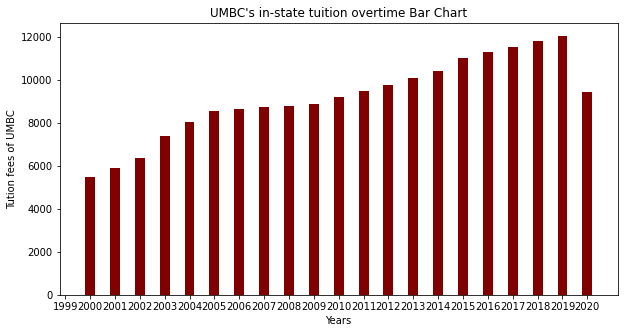

In [26]:
fig = plt.figure(figsize = (10, 5))
plt.bar(yearxaxis, yaxis, color ='maroon',
        width = 0.4)
plt.xlabel("Years")
plt.ylabel("Tution fees of UMBC")
plt.title("UMBC's in-state tuition overtime Bar Chart")
plt.show()

### Plot UMBC's in-state tuition overtime using line Chart

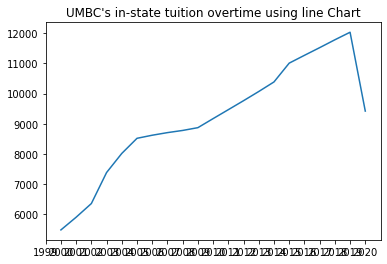

In [27]:
plt.plot(yearxaxis, yaxis)
plt.title("UMBC's in-state tuition overtime using line Chart")
plt.show()

### Tuition Growth Rate

In [28]:
df_umbc['TUITIONFEE_IN']=df_umbc['TUITIONFEE_IN'].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
df_umbc['TUITIONFEE_IN']

2151          0.0
9056          0.0
15923         0.0
22598         0.0
29178      5490.0
35821      5910.0
42524      6362.0
49156      7388.0
55786      8020.0
62522      8520.0
69401      8622.0
76332      8708.0
83291      8780.0
90324      8872.0
97506      9171.0
104960     9467.0
112672     9764.0
120503    10068.0
128353    10384.0
136064    11006.0
143685    11264.0
150891    11518.0
157940    11778.0
164723    12028.0
171401     9420.0
Name: TUITIONFEE_IN, dtype: float64

In [30]:
tutionfee_list=df_umbc.TUITIONFEE_IN.values.tolist()

In [31]:
percentchange_list=[]
for i in range(len(tutionfee_list)):
  if tutionfee_list[i]==0:
    percentchange_list.append(0)
  else:
    initialvalue=tutionfee_list[i-1]
    finalvalue=tutionfee_list[i]
    if initialvalue==0:
      percentchange_list.append(0)
    else:
      ans=float(((finalvalue-initialvalue)/initialvalue)*100)
      percentchange_list.append(ans)


In [32]:
percentchange_list

[0,
 0,
 0,
 0,
 0,
 7.650273224043716,
 7.648054145516074,
 16.12700408676517,
 8.554412560909583,
 6.234413965087282,
 1.1971830985915493,
 0.9974483878450475,
 0.8268259072117593,
 1.0478359908883828,
 3.370153291253381,
 3.227565151019518,
 3.1372134783986483,
 3.11347808275297,
 3.1386571315057608,
 5.989984591679507,
 2.344175904052335,
 2.254971590909091,
 2.2573363431151243,
 2.122601460349805,
 -21.68274027269704]

In [33]:
new_percentchange_list = [ round(elem, 2) for elem in percentchange_list ]

### Add the list of the percentages to the dataframe as a new column ("PCT_CHANGE")

In [34]:
df_umbc['PCT_CHANGE']=new_percentchange_list

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
df_umbc

,UNITID,INSTNM,TUITIONFEE_IN,year,PCT_CHANGE
2151,163268,University of Maryland-Baltimore County,0.0,1996,0.00
9056,163268,University of Maryland-Baltimore County,0.0,1997,0.00
15923,163268,University of Maryland-Baltimore County,0.0,1998,0.00
22598,163268,University of Maryland-Baltimore County,0.0,1999,0.00
29178,163268,University of Maryland-Baltimore County,5490.0,2000,0.00
35821,163268,University of Maryland-Baltimore County,5910.0,2001,7.65
42524,163268,University of Maryland-Baltimore County,6362.0,2002,7.65
49156,163268,University of Maryland-Baltimore County,7388.0,2003,16.13
55786,163268,University of Maryland-Baltimore County,8020.0,2004,8.55
62522,163268,University of Maryland-Baltimore County,8520.0,2005,6.23


In [36]:
year_xaxis=df_umbc.year.values.tolist()

In [37]:
pct_change_yaxis=df_umbc.PCT_CHANGE.values.tolist()

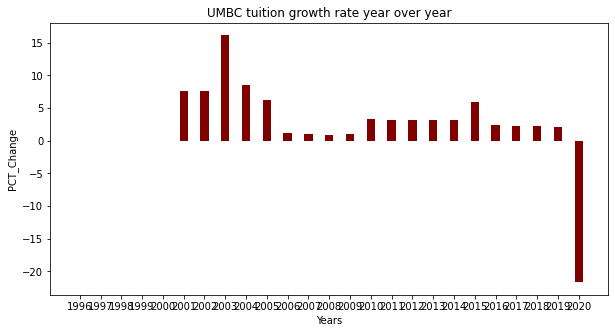

In [38]:
fig = plt.figure(figsize = (10, 5))
plt.bar(year_xaxis, pct_change_yaxis, color ='maroon',
        width = 0.4)
plt.xlabel("Years")
plt.ylabel("PCT_Change")
plt.title("UMBC tuition growth rate year over year")
plt.show()

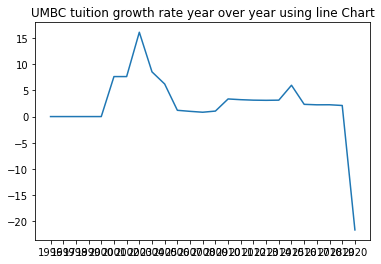

In [39]:
plt.plot(year_xaxis, pct_change_yaxis)
plt.title("UMBC tuition growth rate year over year using line Chart")
plt.show()

In [40]:
df_all

,UNITID,INSTNM,TUITIONFEE_IN,year
0,100636,Community College of the Air Force,NaN,1996
1,100654,Alabama A & M University,NaN,1996
2,100663,University of Alabama at Birmingham,NaN,1996
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,NaN,1996
4,100690,Amridge University,NaN,1996
...,...,...,...,...
176702,49576719,Pennsylvania State University-Penn State Wilke...,13604.0,2020
176703,49576720,Pennsylvania State University-Penn State York,14486.0,2020
176704,49576721,Pennsylvania State University-Penn State Great...,NaN,2020
176705,49576722,Pennsylvania State University-Penn State Harri...,15216.0,2020


In [41]:
instnm_list=df_all.INSTNM.values.tolist()

In [43]:
df_all['TUITIONFEE_IN']=df_all['TUITIONFEE_IN'].fillna(0)

percentchange_list=[]<br>



for i in range(len(tutionfee_list)):<br>
  if tutionfee_list[i]==0:<br>
    percentchange_list.append(0)<br>
  else:<br>
    initialvalue=tutionfee_list[i-1]<br>
    finalvalue=tutionfee_list[i]<br>
    if initialvalue==0:<br>
      percentchange_list.append(0)<br>
    else:<br>
      ans=float(((finalvalue-initialvalue)/initialvalue)*100)<br>
      percentchange_list.append(ans)<br>


In [ ]:
#def growth_rate(list_name):
